In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.x13
from statsmodels.tsa.x13 import x13_arima_select_order, _find_x12
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
df=pd.read_excel('Golbal_combined3.xlsx')
df.head()

,Date,Confirmed_cumulative,Confirmed,Confirmed_cumulative.1,Deaths,Recovered
0,43913,382799,38000,382799,16886,98355
1,43914,424883,42084,424883,19201,107974
2,43915,475998,51115,475998,22022,113753
3,43916,537412,61414,537412,25058,122125
4,43917,601349,63937,601349,28538,130910


In [4]:
df.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

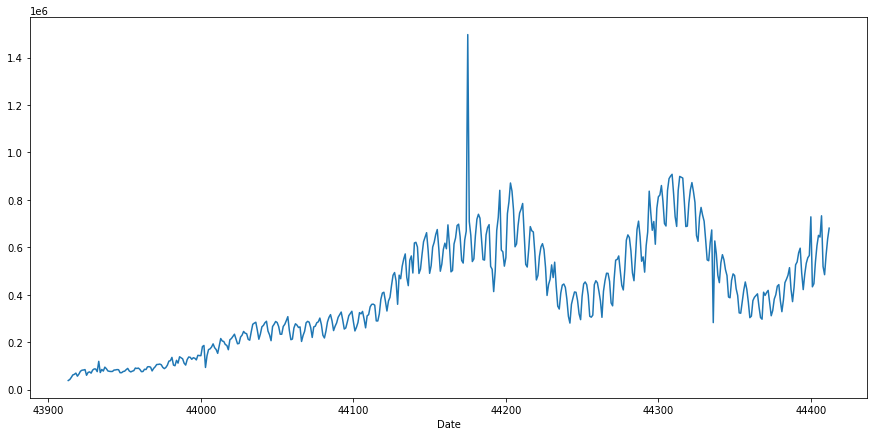

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df['Confirmed'].plot()

In [6]:
#Defining a function to calculate percentage change
df = pd.read_excel('Golbal_combined3.xlsx')
def percentChange(x,numLags):
    '''
    INPUTS:
    x: Column for which we want to calculate percent change
    numLags: The number of days from when the change needs to be calculated. 
            Example : If using daily data - numLags = 1 for daily change
                                            numLags = 30 for monthly change
                                            numLags = 365 for yearly change       
    OUTPUT:
    percentage change in variable
    '''
    y = (x - x.shift(numLags))/x.shift(numLags)
    return y

dataForMl = pd.DataFrame()
dataForMl['Date'] = df['Date']

#here, I only have level variables so I do not need separate my variables into level vs non-level variables
levelVars = df.columns[:-1]
for levelVar in levelVars:
    dataForMl[f'{levelVar}Ret'] = percentChange(df[levelVar],1)
    
dataForMl = dataForMl[1:] #ignoring the first row as it contains null values
test_stationarity(dataForMl, 'ConfirmedRet')

NameError: name 'test_stationarity' is not defined

Here P-value is .000002, which means we will be rejecting the null hypothesis. So data is stationary.

In [ ]:
tsaplots.plot_acf(dataForMl['Date'].astype(float),lags =25)
tsaplots.plot_pacf(dataForMl['Date'].astype(float),lags =25)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Confirmed'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

In [ ]:
df['forecast']=model_fit.predict(start=480,end=650,dynamic=True)
df[['Confirmed','forecast']].plot(figsize=(14,10))

<AxesSubplot:>

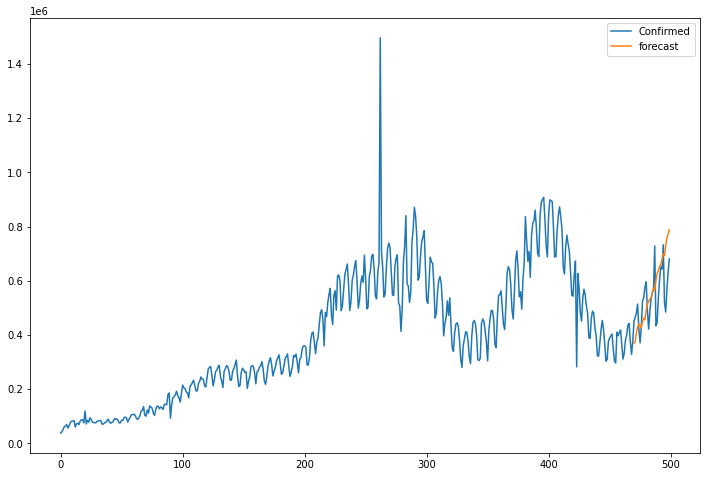

In [25]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Confirmed'],order=(2, 3, 1),seasonal_order=(1,1,1,8))
results=model.fit()
df['forecast']=results.predict(start=470,end=501,dynamic=True)
df[['Confirmed','forecast']].plot(figsize=(12,8))

In [26]:
df['Confirmed']

0       38000
1       42084
2       51115
3       61414
4       63937
        ...  
495    518976
496    484203
497    567366
498    634532
499    680362
Name: Confirmed, Length: 500, dtype: int64

In [27]:
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
print(' r2_score',r2_score(df['Confirmed'],df['forecast']))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [23]:

print('Mean Square Error',mean_squared_error(y_test1,y_pred1))
print('Mean Absolute Error',mean_absolute_error(y_test1,y_pred1))
print('Mean Absolute percentage Error',mean_absolute_percentage_error(y_test1,y_pred1))

NameError: name 'y_test1' is not defined

In [24]:
df

,Date,Confirmed_cumulative,Confirmed,Confirmed_cumulative.1,Deaths,Recovered,forecast
0,43913,382799,38000,382799,16886,98355,NaN
1,43914,424883,42084,424883,19201,107974,8.653845e+04
2,43915,475998,51115,475998,22022,113753,1.549619e+05
3,43916,537412,61414,537412,25058,122125,2.437549e+05
4,43917,601349,63937,601349,28538,130910,3.506580e+05
...,...,...,...,...,...,...,...
495,44408,198390236,518976,198390236,4220935,129705211,4.981354e+10
496,44409,198874439,484203,198874439,4228303,129994389,5.011236e+10
497,44410,199441805,567366,199441805,4236346,130277533,5.041237e+10
498,44411,200076337,634532,200076337,4246749,130582001,5.071357e+10


In [8]:
df['forecast']

KeyError: 'forecast'

In [ ]:
from pandas.tseries.offsets import DateOffset

In [ ]:
future_dates=[df.index[-1] + 1]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[:],columns=df.columns)

In [ ]:
future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])
future_df

print('Mean Square Error',mean_squared_error(y_test1,y_pred1))
print('Mean Absolute Error',mean_absolute_error(y_test1,y_pred1))
print('Mean Absolute percentage Error',mean_absolute_percentage_error(y_test1,y_pred1))